<a href="https://colab.research.google.com/github/Chuck2Win/Tutoring_machine-learning/blob/master/Neural_Network(from_scratch_my).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/Chuck2Win/Tutoring_machine-learning/master/data/mnist%20(1).csv',header=None)

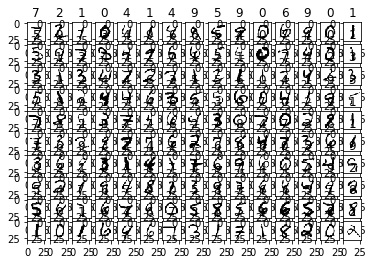

In [ ]:
size_row = 28 # height of the image
size_col = 28 # width of the image
num_image = len(data) # 10000
count = 0 # count for the number of images
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)
#
# example of distance function between two vectors x and y
#
def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
# r = np.sqrt(s)
    return(s)
#
# make a matrix each column of which represents an images in a vector form
#
list_image = np.empty((size_row * size_col, num_image), dtype=float)
list_label = np.empty(num_image, dtype=int)
for i in range(len(data)):
    data_i=data.loc[i,:]
    label = data_i[0]
    im_vector = data.loc[i,:][1:].to_numpy()
    im_vector = normalize(im_vector)
    list_label[count] = label
    list_image[:, count] = im_vector
    count += 1
#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)
for i in range(150):
    label = list_label[i]
    im_vector = list_image[:, i]
    im_matrix = im_vector.reshape((size_row, size_col))
    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    frame = plt.gca()

# 0. Optimization

In [ ]:
def sigmoid(input):
    return 1/(1+np.exp(-input)+1e-7)
def softmax(input):
    # input shape : [N,k]
    s=(np.exp(input).sum(axis=1)+1e-7).reshape(-1,1) 
    return np.exp(input)/s   

In [ ]:
def one_hot_encode(target,k=10):
    one_hot_encoded=np.zeros((len(target),k)) # m,k
    for _,i in enumerate(target):
        one_hot_encoded[_,i]=1
    return one_hot_encoded.T

In [ ]:

one_hot_encode([9],10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# cross entropy loss
def cross_entropy_loss(input,target):
    # input shape : m,k
    # target : m
     
    '''
    example
    input = [[0.7,0.2 0.1]]
    target = [0,1,0]
    '''
    
    return -(target*np.log((input+1e-7))).mean()


In [ ]:
list_image.shape # 784, 10000 
list_label.shape

(784, 10000)

In [ ]:
input_data=list_image.T

In [ ]:
# hidden layer 1개
# vector 형태
class NeuralNet:
    def __init__(self):
        # layer dims : list 형태 ~ (s0,s1,s2)
        # W  ~ (W1,W2)
        self.W1 = np.random.randn(100,784)
        self.W2 = np.random.randn(10,100)
        self.x = None
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        self.dW1 = None
        self.dW2 = None
    def forward(self,input,target):
        # input shape : s0,1
        # z1,a1 shape : s1,1
        # z2,a2 shape : s2,1
        self.x = input
        self.z1 = self.W1.dot(self.x)
        self.a1 = sigmoid(self.z1)
        self.z2 = self.W2.dot(self.a1)
        self.a2 = softmax(self.z2)
        cost = cross_entropy_loss(self.a2,target)
        return cost,self.a2
    def gradient(self,target):
        # target shape : s2,1 <- one hot encoded
        self.dW2 = (self.a2 - target).dot(self.a1.T) #(S2,1).DOT(1,S1) S2,S1
        self.dW1 = (((self.a2 - target).T).dot(self.W2)).T*(sigmoid(self.z1)*(1-sigmoid(self.z1))).dot(self.x.T)  # (1,S2).DOT(S2,S1)= 1,S1 ~ S1,1 //s1.1 dot 1,s0 = s1,s0 
        

In [ ]:
for input,label in zip(input_data,list_label):
    input=input.reshape(-1,1)
    label=one_hot_encode(np.array([label]))

(784, 1)

In [ ]:
acc=(predict.reshape(-1).argmax()==label.reshape(-1).argmax())
acc+1

1

In [ ]:
# label.argmax(0)

3

In [ ]:
# train
lr=0.01
cost=[]
ACC=[]
epochs=10
model=NeuralNet()
for epoch in range(1,epochs+1):
    print(epoch)
    total_loss=0
    total_acc=0
    n=0
    for input,label in zip(input_data,list_label):
        input=input.reshape(-1,1)
        label=one_hot_encode(np.array([label]))
        loss,predict=model.forward(input,label)
        model.gradient(label)
        model.W2=model.W2-lr*model.dW2
        model.W1=model.W1-lr*model.dW1
        total_loss+=loss
        acc=(predict.reshape(-1).argmax()==label.reshape(-1).argmax())
        total_acc+=acc
        n+=1
    total_loss=total_loss/n
    total_acc=total_acc/n
    cost.append(total_loss)
    ACC.append(total_acc)
    print('-'*100)
    print('| epoch %d | cost %.2f | acc %.2f |'%(epoch,total_loss,total_acc))

1
----------------------------------------------------------------------------------------------------
| epoch 1 | cost 0.14 | acc 0.66 |
2
----------------------------------------------------------------------------------------------------
| epoch 2 | cost 0.07 | acc 0.84 |
3
----------------------------------------------------------------------------------------------------
| epoch 3 | cost 0.05 | acc 0.88 |
4
----------------------------------------------------------------------------------------------------
| epoch 4 | cost 0.04 | acc 0.90 |
5
----------------------------------------------------------------------------------------------------
| epoch 5 | cost 0.04 | acc 0.91 |
6
----------------------------------------------------------------------------------------------------
| epoch 6 | cost 0.04 | acc 0.92 |
7
----------------------------------------------------------------------------------------------------
| epoch 7 | cost 0.03 | acc 0.93 |
8
--------------------------------

In [ ]:
predicted=[]
true=[]
for input,label in zip(input_data,list_label):
    input=input.reshape(-1,1)
    label=one_hot_encode(np.array([label]))
    loss,predict=model.forward(input,label)
    predicted.append(predict.reshape(-1).argmax())
    true.append(label.reshape(-1).argmax())

In [ ]:
(np.array(predicted)==np.array(true)).mean() # 94.76 !! 

0.9476

In [ ]:
# hidden layer 1개
# matrix 형태
class NeuralNet:
    def __init__(self):
        # layer dims : list 형태 ~ (s0,s1,s2)
        # W  ~ (W1,W2)
        self.W1 = np.random.randn(100,784)
        self.W2 = np.random.randn(10,100)
        self.x = None
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        self.dW1 = None
        self.dW2 = None
    def forward(self,input,target):
        # input shape : s0,1
        # z1,a1 shape : s1,1
        # z2,a2 shape : s2,1
        self.x = input
        self.z1 = self.W1.dot(self.x)
        self.a1 = sigmoid(self.z1)
        self.z2 = self.W2.dot(self.a1)
        self.a2 = softmax(self.z2)
        cost = cross_entropy_loss(self.a2,target)
        return cost
    def gradient(self,target):
        # target shape : s2,1 <- one hot encoded
        self.dW2 = (self.a2 - target).dot(self.a1.T) #(S2,1).DOT(1,S1) S2,S1
        self.dW1 = (((self.a2 - target).T).dot(W2)).T*(sigmoid(self.z1)*(1-sigmoid(self.z1))).dot(self.x.T)  # (1,S2).DOT(S2,S1)= 1,S1 ~ S1,1 //s1.1 dot 1,s0 = s1,s0 

In [ ]:
# hidden layer 1개

class NeuralNet:
    def __init__(self):
        # layer dims : list 형태 ~ (s0,s1,s2)
        # W  ~ (W1,W2)
        self.W1 = np.random.randn(100,784)
        self.W2 = np.random.randn(10,100)
        self.x = None
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        self.dW1 = None
        self.dW2 = None
    def forward(self,input,target):
        # input shape : s0,m
        # z1,a1 shape : s1,m
        # z2,a2 shape : s2,m
        self.x = input
        self.z1 = self.W1.dot(self.x)
        self.a1 = sigmoid(self.z1)
        self.z2 = self.W2.dot(self.a1)
        self.a2 = softmax(self.z2)
        cost = cross_entropy_loss(self.a2,target)
        return cost
    def gradient(self,target):
        # y shape : s2,m <- one hot encoded
        self.dW2 = (self.a2 - target).dot(self.a1.T) #(S2,m).DOT(m,S1) S2,S1
        self.dW1 = (((self.a2 - target).T).dot(W2)).T*(sigmoid(self.z1)*(1-sigmoid(self.z1))).dot(self.x.T)  # (m,S2).DOT(S2,S1)= m,S1 ~ S1,m //s1.m dot m,s0 = s1,s0 

In [ ]:
model=NeuralNet([2,3,4],1)

In [ ]:
model.forward(np.random.randn(2,2),[2,3])

-0.0

In [ ]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def hypothesis(theta,input):
    return sigmoid(np.dot(input,theta))
    
def objective_function(theta,input,label):
    return (-label*np.log(hypothesis(theta,input))-(1-label)*np.log(1-hypothesis(theta,input))).mean()
    
def gradient_descent(theta,input,label,learning_rate):
    theta=theta-learning_rate*((hypothesis(theta,input)-label).reshape(-1,1)*input).sum(axis=0)
    return theta

# 2. Write down the high dimensional function 


In [ ]:
def hypothesis(theta,input):
    return sigmoid(np.dot(input,theta))

# 3. Plot the training error

In [ ]:
x_train=np.ones((data.shape[0],data.shape[1]))
x_train[:,1:]=data[:,:-1]
y_train=data[:,-1]

In [ ]:
# 초기값 다 0으로
# learning rate 0.00001
# epoch 만큼
cost=[]
ACC=[]
epochs=50000
theta=np.array([0,0,0]) # theta0,theta1,theta2
Theta=[list(theta)] # theta는 np.array인데 list로 바꿔서 append
learning_rate=0.00001
for epoch in range(epochs):
    cost.append(objective_function(theta,x_train,y_train))
    theta=gradient_descent(theta,x_train,y_train,learning_rate)
    Theta.append(list(theta)) 
    acc=((hypothesis(theta,x_train)>0.5)==y_train).mean() # 정확도
    ACC.append(acc)
Theta=np.array(Theta)   

In [ ]:
(hypothesis(theta,x_train)>0.5)==y_train

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True])

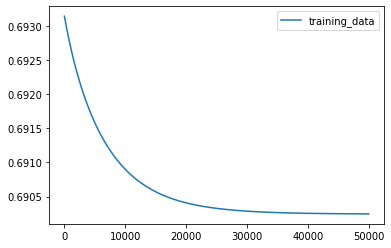

In [ ]:
plt.plot(cost,label='training_data')
plt.legend(loc=0)
plt.show()

#4. Plot the training accuracy

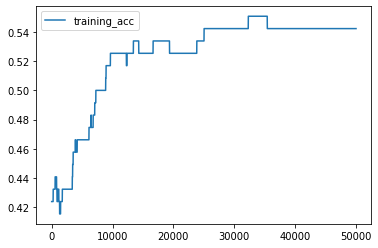

In [ ]:
plt.plot(ACC,label='training_acc')
plt.legend(loc=0)
plt.show()

# 5. Write down the final training accuracy

In [ ]:
print(ACC[-1])

0.5423728813559322


# 6. Plot the optimal classifier superimposed on the training data.


In [ ]:
Z.shape

(77, 79)

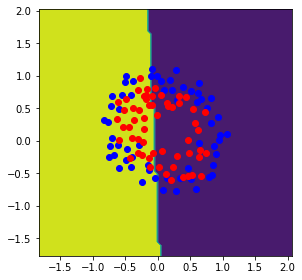

In [ ]:
xx, yy = np.meshgrid(np.arange(pointX.min()-1, pointX.max()+1, 0.05), np.arange(pointY.min()-1, pointX.max()+1,0.05))
X = np.vstack( ( xx.reshape(1, np.product(xx.shape)), yy.reshape(1, np.product(yy.shape)) ) ).T # T는 전치
temp = np.ones((X.shape[0],X.shape[1]+1))
temp[:,1:] = X
# Predict the function value for the whole grid
pred = (hypothesis(theta,temp)>0.5)
Z = pred.reshape(xx.shape)
# Plot the contour and training examples <- 앞 선 문제라고 생각하면 됨.

plt.figure()
plt.contourf(xx, yy, Z)
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()